In [38]:
import pandas as pd
import os

data_dir = '/workspace/media/Udacity/projects/CarND-Behavioral-Cloning-P3/data'
data_csv = os.path.join(data_dir, 'driving_log.csv')

df = pd.read_csv(data_csv, header='infer')
df.describe()

,steering,throttle,brake,speed
count,8036.000000,8036.000000,8036.000000,8036.000000
mean,0.004070,0.869660,0.001970,28.169839
std,0.128840,0.301326,0.036565,6.149327
min,-0.942695,0.000000,0.000000,0.502490
25%,0.000000,0.985533,0.000000,30.183093
50%,0.000000,0.985533,0.000000,30.186400
75%,0.000000,0.985533,0.000000,30.186640
max,1.000000,0.985533,1.000000,30.709360


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f453f831748>,
      dtype=object)

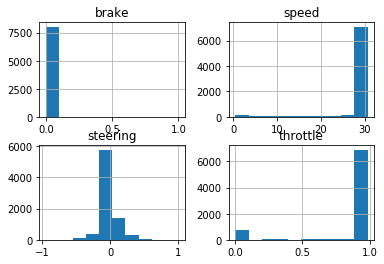

In [39]:
df.hist()

In [2]:
# Iterate through cell
# Input: df : pd.DataFrame
default_data = True
from skimage.io import imread, imshow
import numpy as np
import os

if default_data:
    cam_name = 'center'
    measurement = 'steering'
else:
    cam_name = 0 
    measurement  = 3 

images = list()
measurements = list()

for i in range(len(df)):
    filename = df[cam_name][i].split('/')[-1]
    im = imread(os.path.join(data_dir, 'IMG', filename))
    images.append(im)
    measurements.append(df[measurement][i])
    
X_train = np.array(images)
y_train = np.array(measurements)
X_train.shape

(8036, 160, 320, 3)

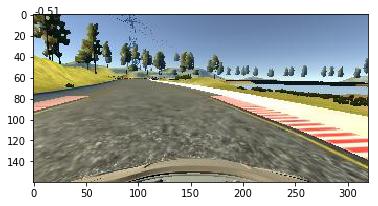

In [25]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

i = np.random.randint(len(X_train))
plt.text(.5, 0, "%.02f" % y_train[i])
plt.imshow(X_train[i])

In [21]:
from keras.layers import Conv2D, MaxPooling2D

def LeNet(inp, n_classes):
    conv1 = Conv2D(6, 5, 5, activation='relu')(inp)
    conv1 = MaxPooling2D()(conv1)
    conv2 = Conv2D(16, 5, 5, activation='relu')(conv1)
    conv2 = MaxPooling2D()(conv2)
    fc0 = Flatten()(conv2)
    fc1 = Dense(120)(fc0)
    fc2 = Dense(84)(fc1)
    return Dense(n_classes)(fc2)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
from keras.layers import Dense, Flatten, Input, Lambda
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16

input_shape = X_train.shape[1:]

inp = Input(input_shape)
inp_proc = Lambda(lambda x: x / 255. - 0.5)(inp)
out = LeNet(inp_proc, 1)

model = Model(inp, out)
model.compile( 'adam' , 'mse')
model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.2, shuffle=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), activation="relu")`
  


Train on 6428 samples, validate on 1608 samples
Epoch 1/5
6428/6428 [==============================] - 9s 1ms/step - loss: 23.6643 - val_loss: 0.0570
Epoch 2/5
6428/6428 [==============================] - 7s 1ms/step - loss: 0.0239 - val_loss: 0.0267
Epoch 3/5
6428/6428 [==============================] - 7s 1ms/step - loss: 0.0179 - val_loss: 0.0222
Epoch 4/5
6428/6428 [==============================] - 7s 1ms/step - loss: 0.0167 - val_loss: 0.0204
Epoch 5/5
6428/6428 [==============================] - 7s 1ms/step - loss: 0.0161 - val_loss: 0.0195


In [24]:
model.save('model.h5')

MSE: 0.0002992627712847005


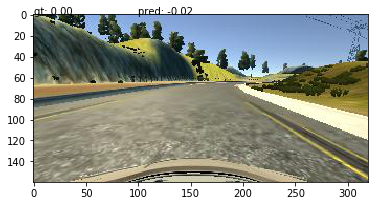

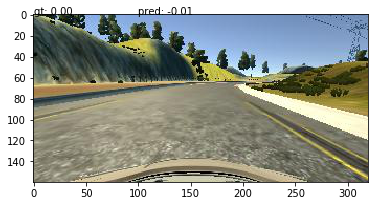

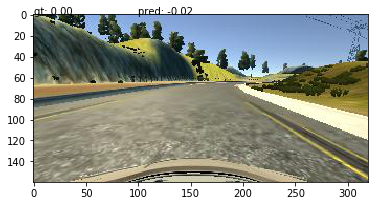

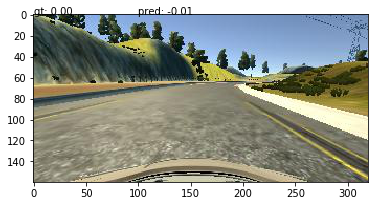

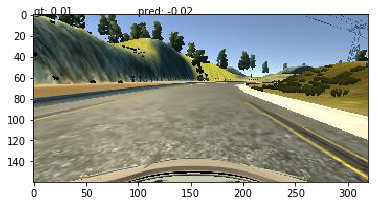

In [36]:
i = np.random.randint(len(X_train))
r = range(i, i+5)
pred_steers = model.predict(X_train[r])
for im, gt_steer, pred_steer in zip(X_train[r], y_train[r], pred_steers):
    plt.figure()
    plt.text(.5, 0, "gt: %.02f" % gt_steer)
    plt.text(100.0, 0, "pred: %.02f" % pred_steer)
    plt.imshow(X_train[i])

print('MSE:', np.mean(np.square((pred_steers - y_train[r]))))